<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_4_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.172075,96.675597,65.342897,1.976875,262.167444,259.992322,2.175121
1,0.0,1.0,41.213192,58.825571,67.896717,0.843756,178.779235,178.268425,0.510809
2,0.0,2.0,42.470038,98.020759,83.564878,-2.069068,231.986607,234.459730,-2.473123
3,0.0,3.0,75.852006,23.356844,99.051197,-0.488451,207.771596,208.780771,-1.009175
4,0.0,4.0,99.881057,39.151046,44.231394,0.594424,193.857920,192.869999,0.987921
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.586678,46.209756,80.065603,-2.939015,183.923022,187.661354,-3.738332
19996,999.0,16.0,64.708982,80.441863,70.608345,-3.436043,222.323148,224.263967,-1.940819
19997,999.0,17.0,74.929955,86.643945,61.557462,5.640001,238.771363,231.195726,7.575636
19998,999.0,18.0,60.706866,34.670125,85.789559,-0.151401,191.015149,193.299246,-2.284097


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.172075,96.675597,65.342897,1.976875,262.167444,259.992322,2.175121
1,0.0,1.0,41.213192,58.825571,67.896717,0.843756,178.779235,178.268425,0.510809
2,0.0,2.0,42.470038,98.020759,83.564878,-2.069068,231.986607,234.459730,-2.473123
3,0.0,3.0,75.852006,23.356844,99.051197,-0.488451,207.771596,208.780771,-1.009175
4,0.0,4.0,99.881057,39.151046,44.231394,0.594424,193.857920,192.869999,0.987921
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.586678,46.209756,80.065603,-2.939015,183.923022,187.661354,-3.738332
19996,999.0,16.0,64.708982,80.441863,70.608345,-3.436043,222.323148,224.263967,-1.940819
19997,999.0,17.0,74.929955,86.643945,61.557462,5.640001,238.771363,231.195726,7.575636
19998,999.0,18.0,60.706866,34.670125,85.789559,-0.151401,191.015149,193.299246,-2.284097


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

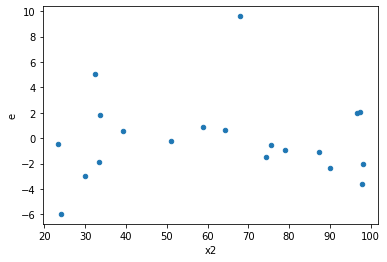

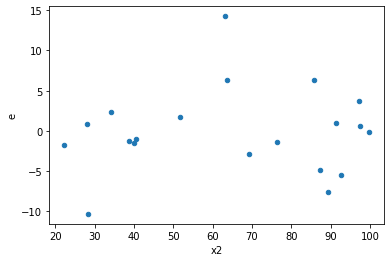

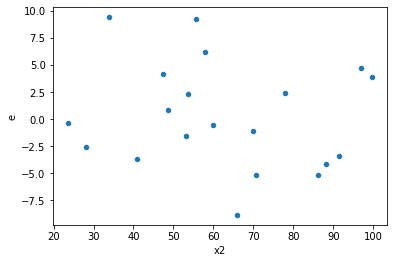

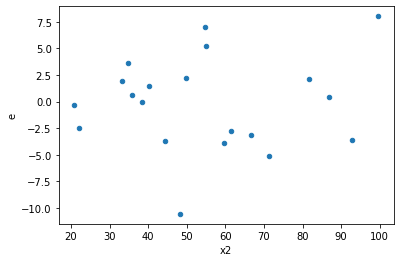

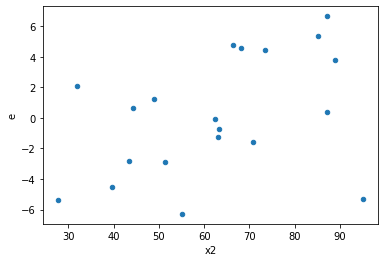

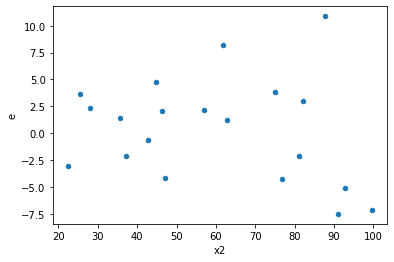

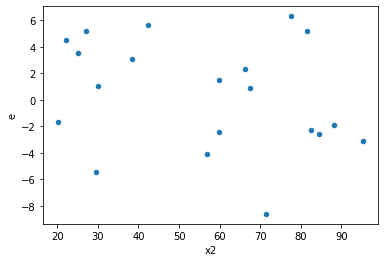

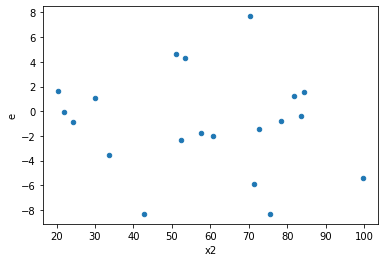

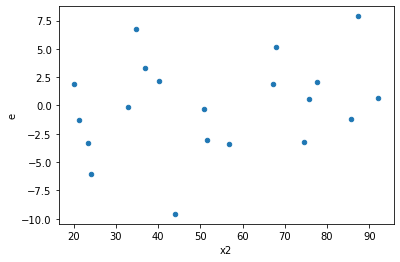

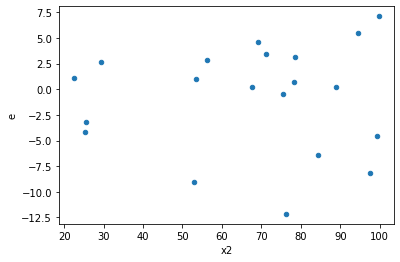

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,7.0,7.0,75.884646351638,96.79606238259309,12.647441058606333,16.132677063765517,1.2755684718362492,0.7562946782437563,0.6218526608781219,Reject001=1 : Homoscedasticity
3.0,6.0,8.0,45.97154924291299,173.4596851158283,9.194309848582598,24.7799550165469,2.8298973164783376,0.22180295870145472,0.8890985206492726,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,31.238578276503052,152.14785397883932,10.412859425501017,16.905317108759924,1.948204590261798,0.5442151979620229,0.7278924010189886,Reject001=1 : Homoscedasticity
6.0,9.0,5.0,126.77066983374438,73.35978035615038,15.846333729218047,18.339945089037595,1.0416258335957902,0.8994209023235284,0.5502895488382358,Reject001=1 : Homoscedasticity
7.0,2.0,12.0,8.153419231232025,180.41798238558775,8.153419231232025,16.401634762326157,3.687982045096877,0.4658990044765634,0.7670504977617183,Reject001=1 : Homoscedasticity
10.0,5.0,9.0,37.17759136521442,184.08421394525936,9.294397841303605,23.01052674315742,2.750823923549155,0.27759697015961704,0.8612015149201915,Reject001=1 : Homoscedasticity
15.0,8.0,6.0,191.73984693595594,297.36873469295625,27.391406705136564,59.47374693859125,2.0678625366260426,0.3367025206463743,0.8316487396768129,Reject001=1 : Homoscedasticity
16.0,6.0,8.0,53.63033277576409,131.73372996872465,10.726066555152817,18.81910428124638,1.8422465862675386,0.47235255798261244,0.7638237210086938,Reject001=1 : Homoscedasticity
18.0,6.0,8.0,116.74801001466732,176.3131733760515,23.349602002933462,25.187596196578788,1.1326521112901682,0.90461748091372,0.54769125954314,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,75.884646351638,96.79606238259309,12.647441058606333,16.132677063765517,1.2755684718362492,1.2437053217562437,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,135.3690314572059,175.36689638421697,27.07380629144118,25.052413769173853,0.971604589855854,0.94147424459839,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,138.19856900114343,127.47782647887345,23.033094833523904,21.246304413145577,0.9224250829820004,0.9179057547100519,Reject001=1 : Homoscedasticity
3.0,6.0,8.0,45.97154924291299,173.4596851158283,9.194309848582598,24.7799550165469,2.8298973164783376,0.22180295870145472,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,31.238578276503052,152.14785397883932,10.412859425501017,16.905317108759924,1.948204590261798,1.455784802037977,Reject001=1 : Homoscedasticity
5.0,5.0,9.0,207.29649936752332,108.31319609939808,51.82412484188083,13.53914951242476,0.29027985526332656,0.10277337765296067,Reject001=1 : Homoscedasticity
6.0,9.0,5.0,126.77066983374438,73.35978035615038,15.846333729218047,18.339945089037595,1.0416258335957902,1.1005790976764716,Reject001=1 : Homoscedasticity
7.0,2.0,12.0,8.153419231232025,180.41798238558775,8.153419231232025,16.401634762326157,3.687982045096877,0.4658990044765634,Reject001=1 : Homoscedasticity
8.0,4.0,10.0,61.79939987626209,157.37291821045918,20.59979995875403,17.48587980116213,1.0186048312802989,0.9198964627403714,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      965
Reject001=0 : Heteroscedasticity     35
Name: Result_test, dtype: int64